Problem Statement:
An automobile parts manufacturing company has collected data of transactions for 3 years. They do not have any in-house data science team, thus they have hired you as their consultant. Your job is to use your magical data science skills to provide them with suitable insights about their data and their customers.

Auto Sales Data: Sales_Data.xlsx

# Import libraries

In [ ]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_excel('/content/drive/MyDrive/Smita/Google Drive/Great Learning/Greatlearning_PGPDSBA (Rivision)/Final_Market _Analytics/RFM _Analysis/Sales_Data.xlsx')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Let's view the types of data

In [ ]:
df.dtypes

ORDERNUMBER                      int64
QUANTITYORDERED                  int64
PRICEEACH                      float64
ORDERLINENUMBER                  int64
SALES                          float64
ORDERDATE               datetime64[ns]
DAYS_SINCE_LASTORDER             int64
STATUS                          object
PRODUCTLINE                     object
MSRP                             int64
PRODUCTCODE                     object
CUSTOMERNAME                    object
PHONE                           object
ADDRESSLINE1                    object
CITY                            object
POSTALCODE                      object
COUNTRY                         object
CONTACTLASTNAME                 object
CONTACTFIRSTNAME                object
DEALSIZE                        object
dtype: object

# Convert order date to datetime format

In [ ]:

df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])


# Check the type of data

In [ ]:

df.dtypes

ORDERNUMBER                      int64
QUANTITYORDERED                  int64
PRICEEACH                      float64
ORDERLINENUMBER                  int64
SALES                          float64
ORDERDATE               datetime64[ns]
DAYS_SINCE_LASTORDER             int64
STATUS                          object
PRODUCTLINE                     object
MSRP                             int64
PRODUCTCODE                     object
CUSTOMERNAME                    object
PHONE                           object
ADDRESSLINE1                    object
CITY                            object
POSTALCODE                      object
COUNTRY                         object
CONTACTLASTNAME                 object
CONTACTFIRSTNAME                object
DEALSIZE                        object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ORDERNUMBER           2747 non-null   int64         
 1   QUANTITYORDERED       2747 non-null   int64         
 2   PRICEEACH             2747 non-null   float64       
 3   ORDERLINENUMBER       2747 non-null   int64         
 4   SALES                 2747 non-null   float64       
 5   ORDERDATE             2747 non-null   datetime64[ns]
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64         
 7   STATUS                2747 non-null   object        
 8   PRODUCTLINE           2747 non-null   object        
 9   MSRP                  2747 non-null   int64         
 10  PRODUCTCODE           2747 non-null   object        
 11  CUSTOMERNAME          2747 non-null   object        
 12  PHONE                 2747 non-null   object        
 13  ADDRESSLINE1      

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ORDERNUMBER           2747 non-null   int64         
 1   QUANTITYORDERED       2747 non-null   int64         
 2   PRICEEACH             2747 non-null   float64       
 3   ORDERLINENUMBER       2747 non-null   int64         
 4   SALES                 2747 non-null   float64       
 5   ORDERDATE             2747 non-null   datetime64[ns]
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64         
 7   STATUS                2747 non-null   object        
 8   PRODUCTLINE           2747 non-null   object        
 9   MSRP                  2747 non-null   int64         
 10  PRODUCTCODE           2747 non-null   object        
 11  CUSTOMERNAME          2747 non-null   object        
 12  PHONE                 2747 non-null   object        
 13  ADDRESSLINE1      

In [ ]:
# Check the number of Null values in the data
df.isnull().sum()

ORDERNUMBER             0
QUANTITYORDERED         0
PRICEEACH               0
ORDERLINENUMBER         0
SALES                   0
ORDERDATE               0
DAYS_SINCE_LASTORDER    0
STATUS                  0
PRODUCTLINE             0
MSRP                    0
PRODUCTCODE             0
CUSTOMERNAME            0
PHONE                   0
ADDRESSLINE1            0
CITY                    0
POSTALCODE              0
COUNTRY                 0
CONTACTLASTNAME         0
CONTACTFIRSTNAME        0
DEALSIZE                0
dtype: int64

- There are no Null values in data 
- Country would represent the order grographical information.
- Also we can drop city, address1, phone number, customername  and others since they are not required for the analysis

# Obtain the number of unique values in each column

In [ ]:
df.nunique()

ORDERNUMBER              298
QUANTITYORDERED           58
PRICEEACH               1984
ORDERLINENUMBER           18
SALES                   2690
ORDERDATE                246
DAYS_SINCE_LASTORDER    1832
STATUS                     6
PRODUCTLINE                7
MSRP                      80
PRODUCTCODE              109
CUSTOMERNAME              89
PHONE                     88
ADDRESSLINE1              89
CITY                      71
POSTALCODE                73
COUNTRY                   19
CONTACTLASTNAME           76
CONTACTFIRSTNAME          72
DEALSIZE                   3
dtype: int64

In [ ]:
df['COUNTRY'].value_counts().index

Index(['USA', 'Spain', 'France', 'Australia', 'UK', 'Italy', 'Finland',
       'Norway', 'Singapore', 'Canada', 'Denmark', 'Germany', 'Sweden',
       'Austria', 'Japan', 'Belgium', 'Switzerland', 'Philippines', 'Ireland'],
      dtype='object')

In [ ]:
df['COUNTRY'].value_counts()

USA            928
Spain          342
France         314
Australia      185
UK             144
Italy          113
Finland         92
Norway          85
Singapore       79
Canada          70
Denmark         63
Germany         62
Sweden          57
Austria         55
Japan           52
Belgium         33
Switzerland     31
Philippines     26
Ireland         16
Name: COUNTRY, dtype: int64

In [ ]:
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'DAYS_SINCE_LASTORDER', 'STATUS', 'PRODUCTLINE',
       'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'CITY',
       'POSTALCODE', 'COUNTRY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ORDERNUMBER,2747.0,10259.761558,91.877521,10100.00,10181.000,10264.00,10334.500,10425.00
QUANTITYORDERED,2747.0,35.103021,9.762135,6.00,27.000,35.00,43.000,97.00
PRICEEACH,2747.0,101.098951,42.042548,26.88,68.745,95.55,127.100,252.87
ORDERLINENUMBER,2747.0,6.491081,4.230544,1.00,3.000,6.00,9.000,18.00
SALES,2747.0,3553.047583,1838.953901,482.13,2204.350,3184.80,4503.095,14082.80
DAYS_SINCE_LASTORDER,2747.0,1757.085912,819.280576,42.00,1077.000,1761.00,2436.500,3562.00
MSRP,2747.0,100.691664,40.114802,33.00,68.000,99.00,124.000,214.00


In [ ]:
df.duplicated().sum()

0

Univriate Analysis
This dataset contains 20 columns. For the sake of univariate analysis let us use just one column of data - 'SALES'.

In [ ]:
data = df['SALES']

In [ ]:
len(data)

2747

# The first step is to check if the data has any missing values. Some plots will not work in the presence of missing values. So we need to take care of them.

In [ ]:

data.isnull().sum()

0

### The plot displayed below is called as a Histogram
### The X-axis groups the observations from minimum to maximum along the axis on the basis of the discrete points 
### or class intervals
### The Y-axis measures the frequency of occurance of observations for each discrete point or class interval.

### The following code plots a histrogram using the matplotlib package.
### The bins argument creates class intervals. In this case we are creating 50 such intervals

(array([ 15.,  38.,  92., 133., 171., 174., 190., 201., 196., 179., 171.,
        159., 143., 119., 103.,  85.,  72.,  72.,  72.,  57.,  50.,  44.,
         26.,  33.,  33.,  25.,  10.,  14.,  17.,  10.,   9.,   7.,   5.,
          6.,   1.,   3.,   1.,   2.,   1.,   1.,   1.,   3.,   1.,   0.,
          1.,   0.,   0.,   0.,   0.,   1.]),
 array([  482.13  ,   754.1434,  1026.1568,  1298.1702,  1570.1836,
         1842.197 ,  2114.2104,  2386.2238,  2658.2372,  2930.2506,
         3202.264 ,  3474.2774,  3746.2908,  4018.3042,  4290.3176,
         4562.331 ,  4834.3444,  5106.3578,  5378.3712,  5650.3846,
         5922.398 ,  6194.4114,  6466.4248,  6738.4382,  7010.4516,
         7282.465 ,  7554.4784,  7826.4918,  8098.5052,  8370.5186,
         8642.532 ,  8914.5454,  9186.5588,  9458.5722,  9730.5856,
        10002.599 , 10274.6124, 10546.6258, 10818.6392, 11090.6526,
        11362.666 , 11634.6794, 11906.6928, 12178.7062, 12450.7196,
        12722.733 , 12994.7464, 13266.7598, 13

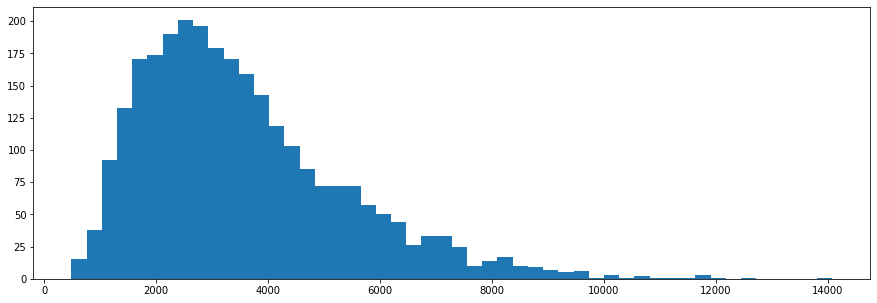

In [ ]:
figure = plt.figure(figsize=(15,5))
plt.hist(data, bins=50)

In the above histogram, the first array is the frequency in each class and the second array contains the edges of the class intervals. These arrays can be assigned to a variable and used for further analysis.

###Plots a frequency polygon superimposed on a histogram using the seaborn package.
### Seaborn automatically creates class intervals. The number of bins can also be manually set.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


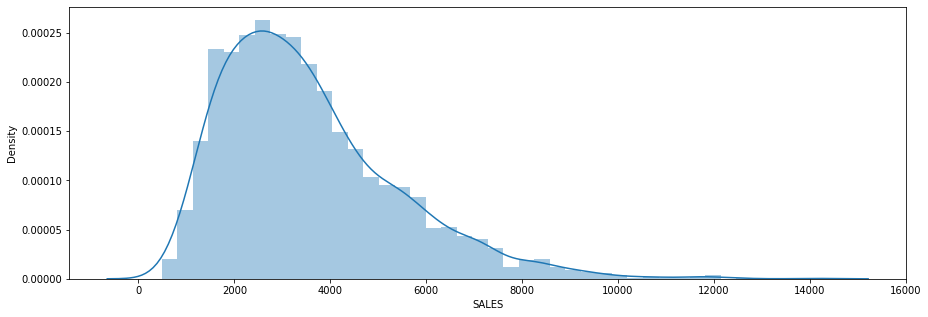

In [ ]:
figure = plt.figure(figsize=(15,5))
sns.distplot(data)

 ### Adding an argument to plot only frequency polygon

###Now let us have a closer look at the distribution by plotting a simple histogram with 10 bins

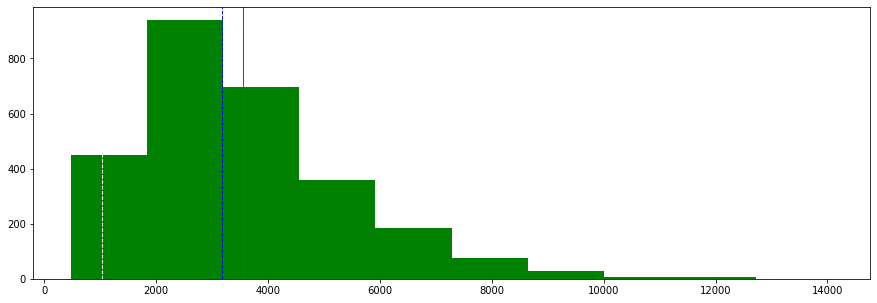

In [ ]:
1
figure = plt.figure(figsize=(15,5)) # makes the plot wider
2
plt.hist(data, color='g') # plots a simple histogram
3
plt.axvline(data.mean(), color='m', linewidth=1)
4
plt.axvline(data.median(), color='b', linestyle='dashed', linewidth=1)
5
plt.axvline(data.mode()[0], color='w', linestyle='dashed', linewidth=1)

In the above histogram we can see that the second bin has the most number of observations. A bulk of the observations lie within the first four classes. The rest of the six classes contain only a very few observations. In this case we are measuring sales. We can safely say based on visual observation that most of the sales present on the data are approximately in range of Rs.2000- Rs.6000 There are very few orders with sales greater than Rs.6000 onwards . From the above figure we can see the the mean is represented by the magenta line and the mode by the white line . The median is represented by the blue line. We can see from the above figure that the median and the mean are very close to each other and that the mode is lower than both.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


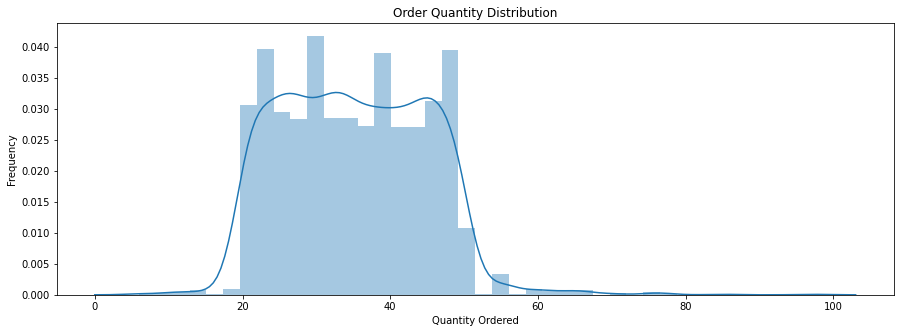

In [ ]:
figure = plt.figure(figsize=(15,5))
sns.distplot(df['QUANTITYORDERED'])
plt.title('Order Quantity Distribution')
plt.xlabel('Quantity Ordered')
plt.ylabel('Frequency')
plt.show()

From the distribution plot of quantity, we can infer that the orders are bulk orders. Majority of the order's quantity are between 20 -50 units

# Price Distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


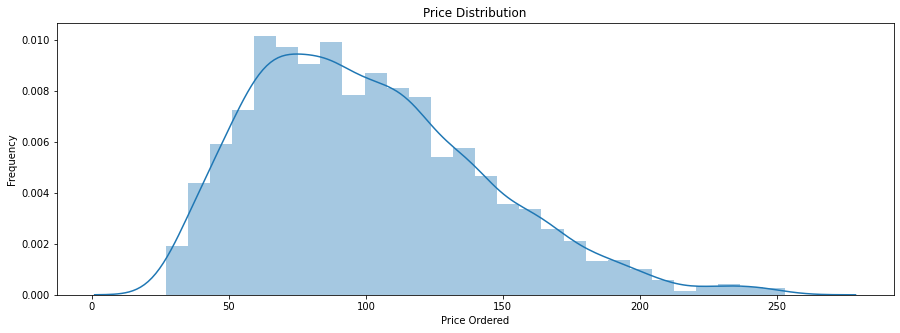

In [ ]:
figure = plt.figure(figsize=(15,5))
sns.distplot(df['PRICEEACH'])
plt.title('Price Distribution')
plt.xlabel('Price Ordered')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df['PRICEEACH'].median()

95.55

The distribution of Price is right Skewed with max price of 250. Interestingly, median price is as 95.55 at this price most of orders are received .

# Analyzing the STATUS variable

In [ ]:
df['STATUS'].value_counts(normalize = True)

Shipped       0.925009
Cancelled     0.021842
Resolved      0.017110
On Hold       0.016017
In Process    0.014925
Disputed      0.005096
Name: STATUS, dtype: float64

92% status belongs to shipped category which is the highest while disputed is the least in percentage

# Dealsize Distribution

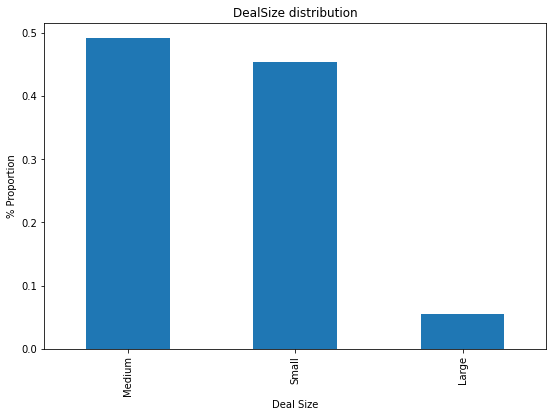

In [ ]:
plt.figure(figsize=(9,6))
df['DEALSIZE'].value_counts(normalize = True).plot(kind = 'bar')
plt.title('DealSize distribution')
plt.xlabel('Deal Size')
plt.ylabel('% Proportion')
plt.show()

# Top 10 countries by Sales

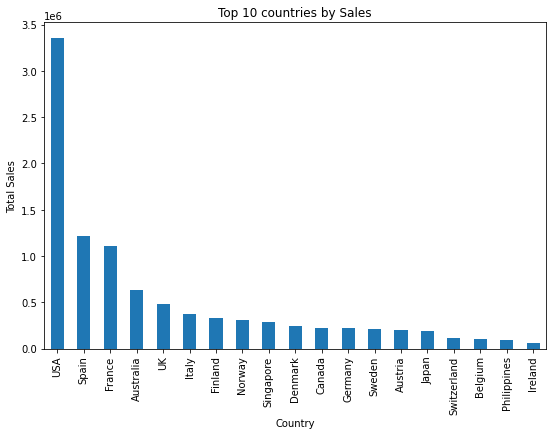

In [ ]:
plt.figure(figsize=(9,6))
top_cities = df.groupby(['COUNTRY'])['SALES'].sum().sort_values(ascending=False)
top_cities.plot(kind = 'bar')
plt.title('Top 10 countries by Sales')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.show()

# Let's plot the data to get more insight.

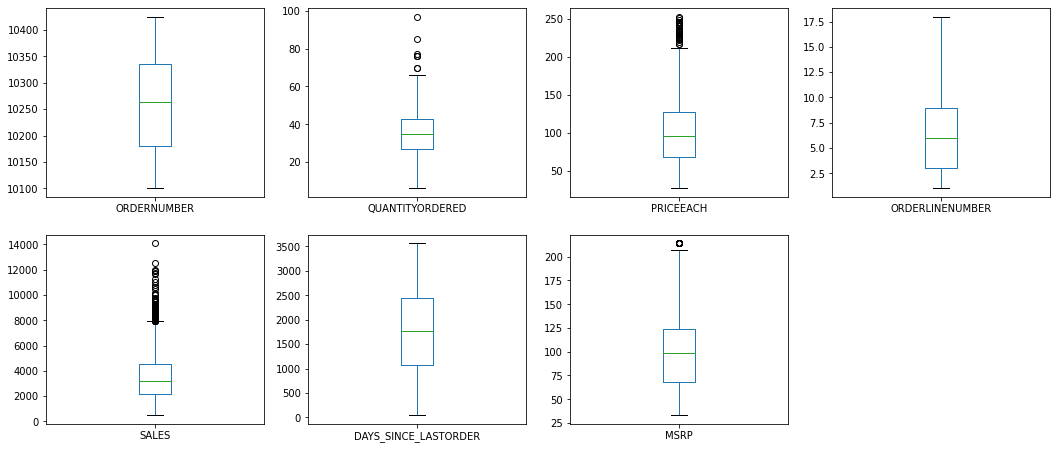

In [ ]:
plt.rcParams['figure.figsize'] = [18, 16]
df.plot(kind="box",subplots=True,layout=(4,4),sharex=False,sharey=False)
plt.show()

BIVARIATE ANALYSIS

Bivariate Analysis

Through bivariate analysis we try to analyze two variables simultaneously. As opposed to univariate analysis where we check the characteristics of a single variable, in bivariate analysis we try to determine if there is any relationship between two variables.

There are essentially 3 major scenarios that we will come accross when we perform bivariate analysis

Both variables of interest are qualitative One variable is qualitative and the other is quantitative Both variables are quantitative

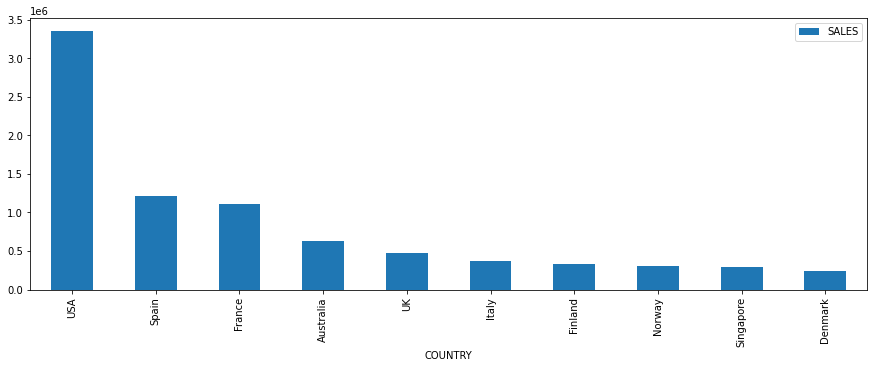

In [ ]:
df.groupby(by=['COUNTRY'])['SALES'].sum().reset_index().sort_values(['SALES'],
                    ascending=False).head(10).plot(x='COUNTRY',y='SALES',kind='bar', figsize=(15,5))

plt.show()

USA has the highest number of sales followed by the Spain and France.While Denmarkis least in sales .

Bar plot for Number of Sales Vs orderedquantity

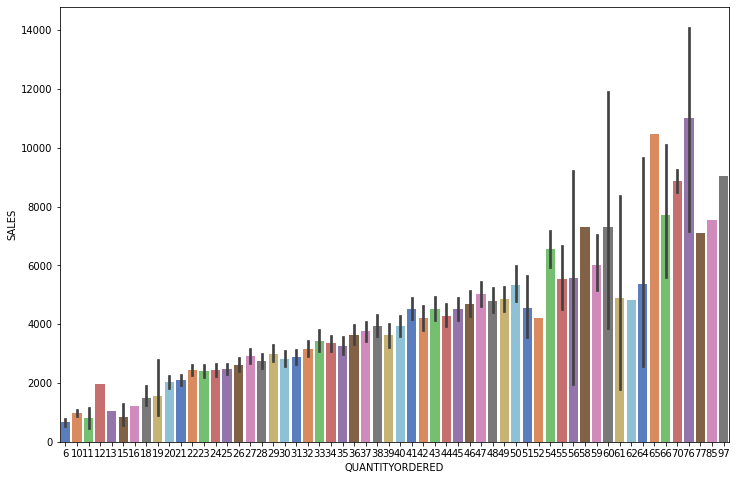

In [ ]:
plt.figure(figsize=(12,8))  # setting the figure size
ax = sns.barplot(x='QUANTITYORDERED', y='SALES', data=df, palette='muted')

Sales is higher between the order quantity range of 60-75 orders

#  Bar plot Number of Sales Vs MSRP

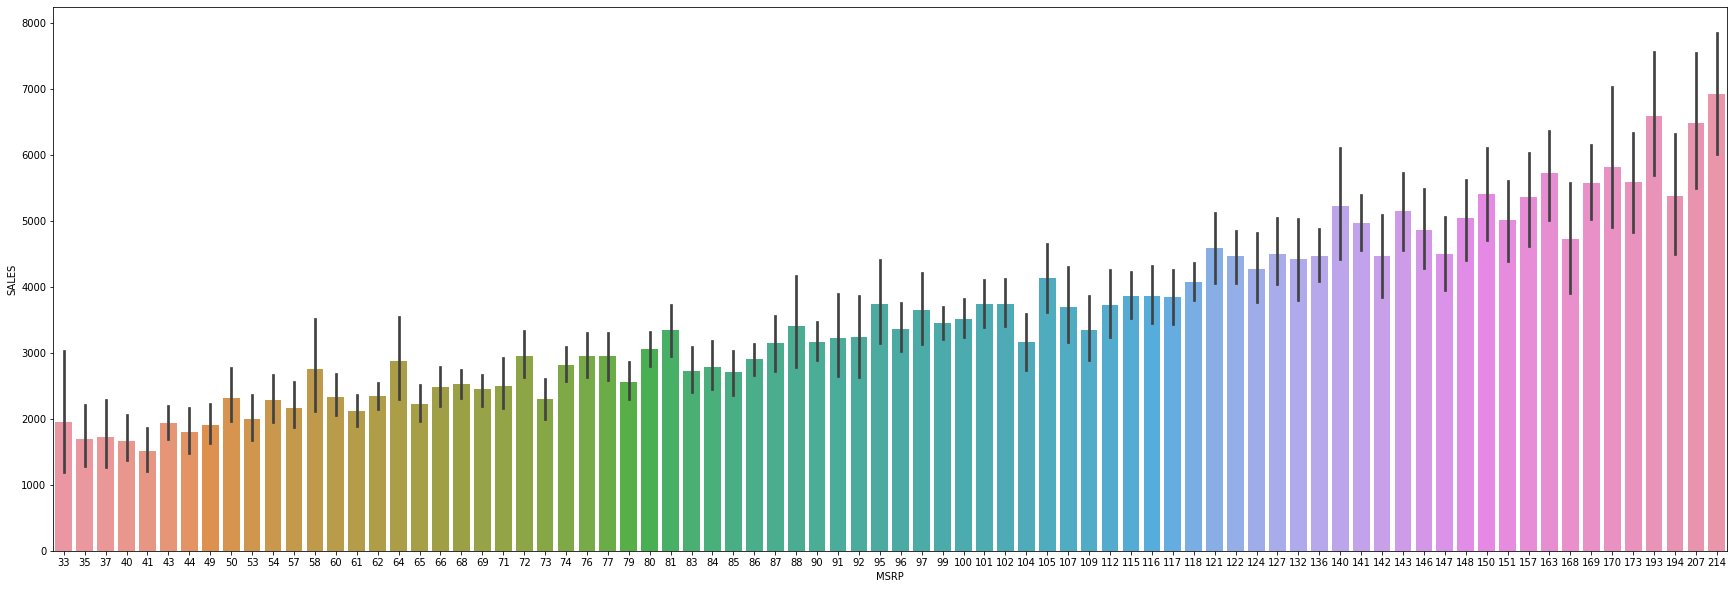

In [ ]:
plt.figure(figsize=(30,10))
ax = sns.barplot(x="MSRP", y="SALES", data=df)

Sales are the highest for higher MSRP .As the MSRP increases sales increases too

#  Bar plot Number of Sales Vs Status

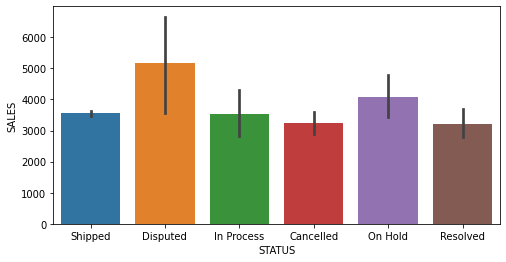

In [ ]:
plt.figure(figsize=(8,4))
ax = sns.barplot(x="STATUS", y="SALES", data=df)

Sales are the highest among the Disputed status and lowest among cancelled ,resolved status.

#  Bar plot Number of Sales Vs productline

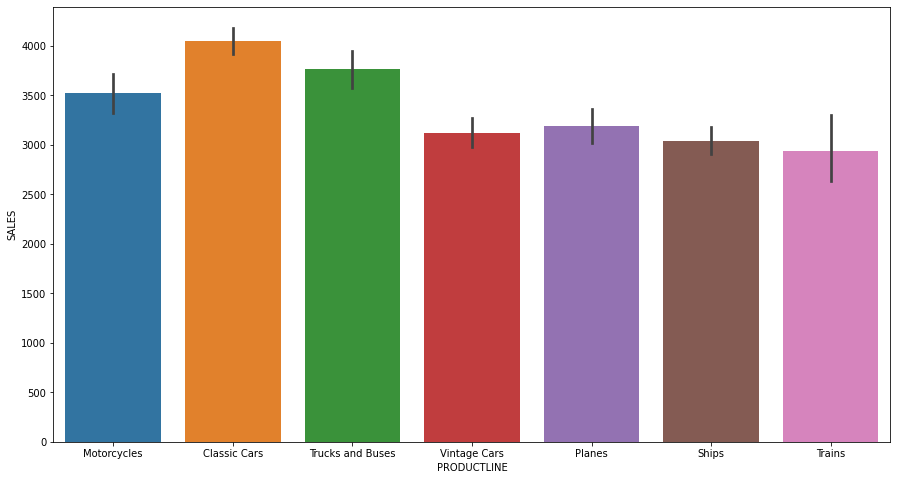

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x="PRODUCTLINE", y="SALES", data=df)

Sales are the highest for classic cars fllowed by trucks and buses and lowest for trains

#  Bar plot Number of Sales Vs dealsize

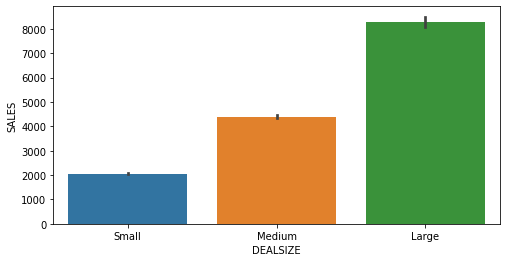

In [ ]:
plt.figure(figsize=(8,4))
ax = sns.barplot(x="DEALSIZE", y="SALES", data=df)

Sales are the highest for large dealsize and lowest for small dealsized.

Multivariate analysis

Multivariate analysis is performed to understand interactions between different fields in the dataset (or) finding interactions between variables more than 2 ex: Pairplot, 3D scatter plot

Scatter Plot A Scatter plot gives us an idea of the association between two variables

In [ ]:
df=pd.read_excel('/content/drive/MyDrive/Smita/Google Drive/Great Learning/Greatlearning_PGPDSBA (Rivision)/Final_Market _Analytics/RFM _Analysis/Sales_Data.xlsx')
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2018-02-24,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2018-05-07,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2018-07-01,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2018-08-25,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,2018-10-28,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


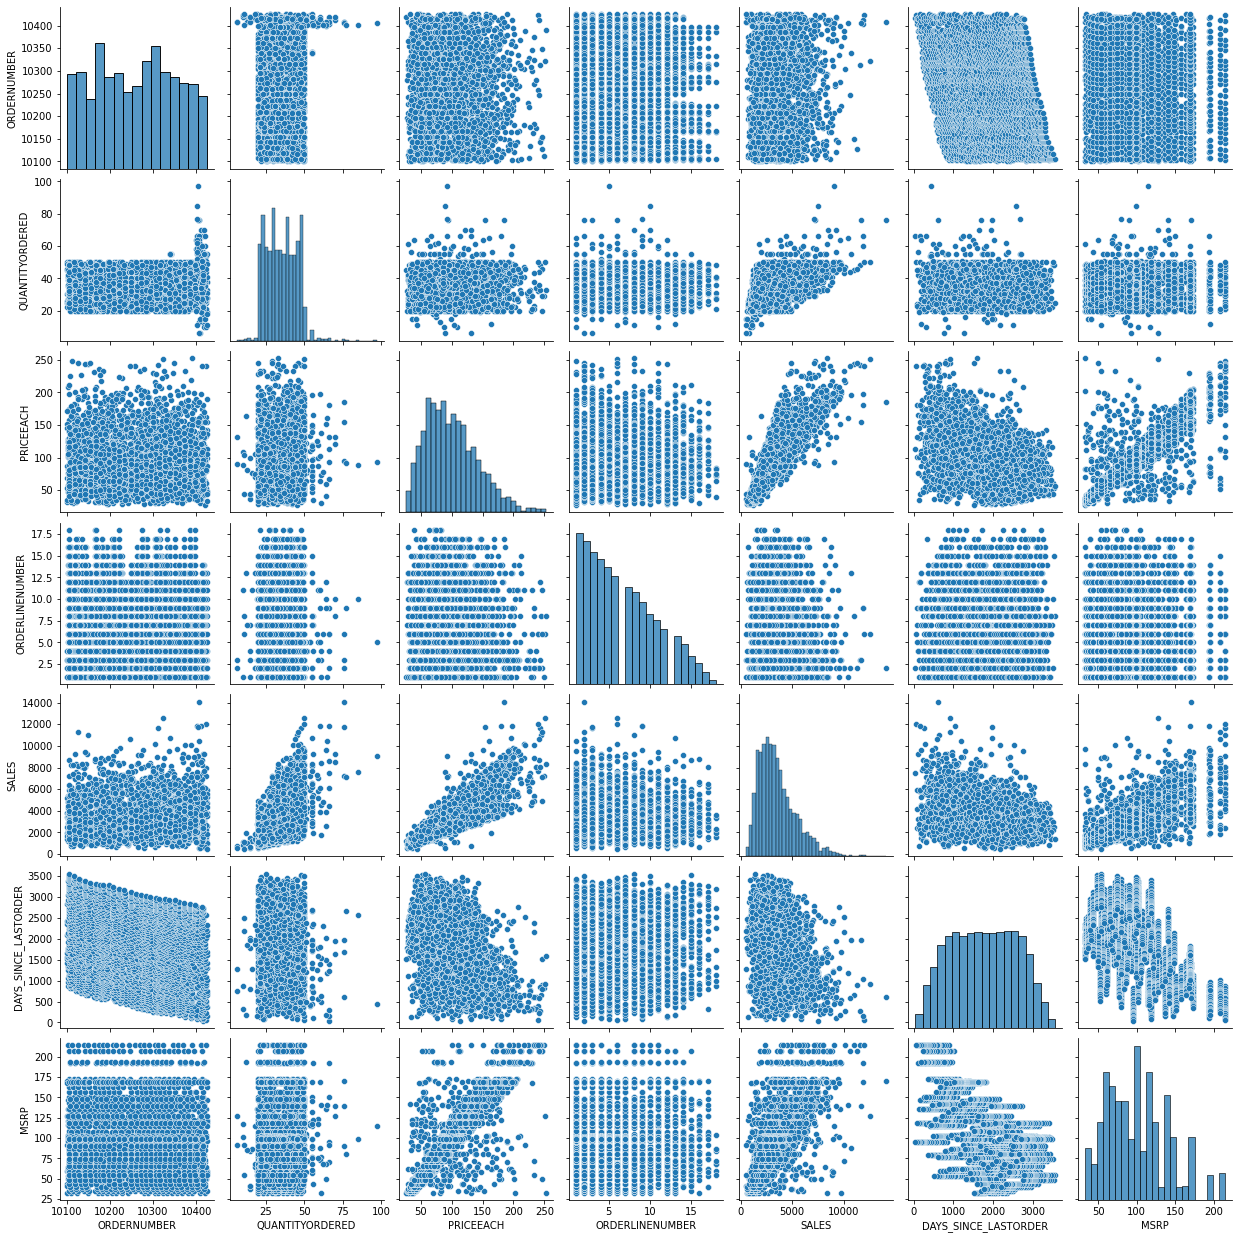

In [ ]:
sns.pairplot(df)

A trend exists between 'SALES' and 'QUANTITYORDERED' A trend exists between 'MSRP' and 'PRICEEACH' A trend exists between 'PRICEEACH' and 'SALES'

In the above plot scatter diagrams are plotted for all the numerical columns in the dataset. A scatter plot is a visual representation of the degree of correlation between any two columns. The pair plot function in seaborn makes it very easy to generate joint scatter plots for all the columns in the data. A scatter plot can also be plotted for two individual columns:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


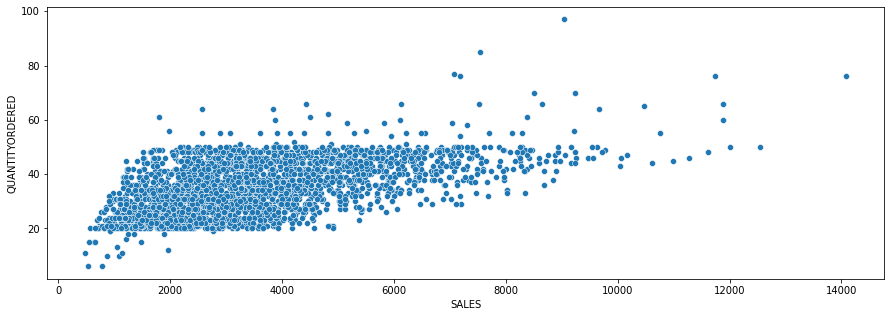

In [ ]:
figure = plt.figure(figsize=(15,5))
sns.scatterplot(df['SALES'], df['QUANTITYORDERED'])  # Plots the scatter 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


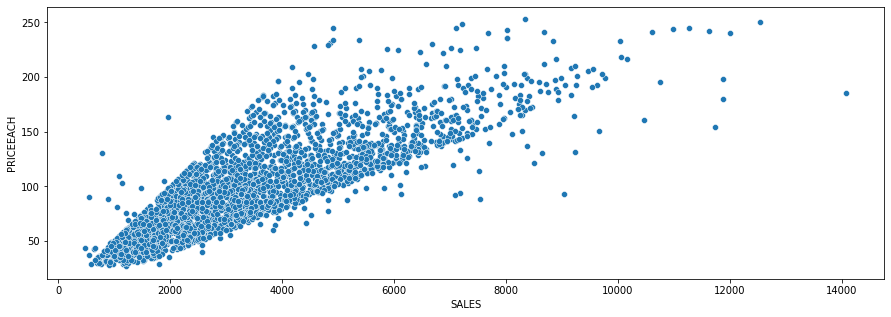

In [ ]:
figure = plt.figure(figsize=(15,5))
sns.scatterplot(df['SALES'], df['PRICEEACH'])  # Plots the scatter 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


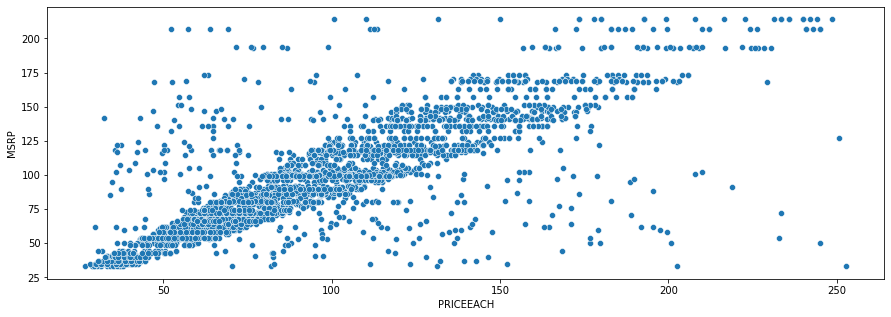

In [ ]:
figure = plt.figure(figsize=(15,5))
sns.scatterplot(df['PRICEEACH'], df['MSRP'])  # Plots the scatter 

The scatter plot only offers visual information about the degree of correlation. In order to obtain more precise information we can use the inbuilt .corr() method in Pandas. This returns a table with all the correlations calculated for the numerical columns.

###Displays the correlation between every possible pair of

In [ ]:
df.corr()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,DAYS_SINCE_LASTORDER,MSRP
ORDERNUMBER,1.000000,0.067110,-0.003369,-0.054300,0.037289,-0.251476,-0.013910
QUANTITYORDERED,0.067110,1.000000,0.010161,-0.016295,0.553359,-0.021923,0.020551
PRICEEACH,-0.003369,0.010161,1.000000,-0.052646,0.808287,-0.397092,0.778393
ORDERLINENUMBER,-0.054300,-0.016295,-0.052646,1.000000,-0.057414,0.046615,-0.020956
SALES,0.037289,0.553359,0.808287,-0.057414,1.000000,-0.334274,0.634849
DAYS_SINCE_LASTORDER,-0.251476,-0.021923,-0.397092,0.046615,-0.334274,1.000000,-0.524285
MSRP,-0.013910,0.020551,0.778393,-0.020956,0.634849,-0.524285,1.000000


### The same can be represented graphically using a the heatmap function in seaborn.

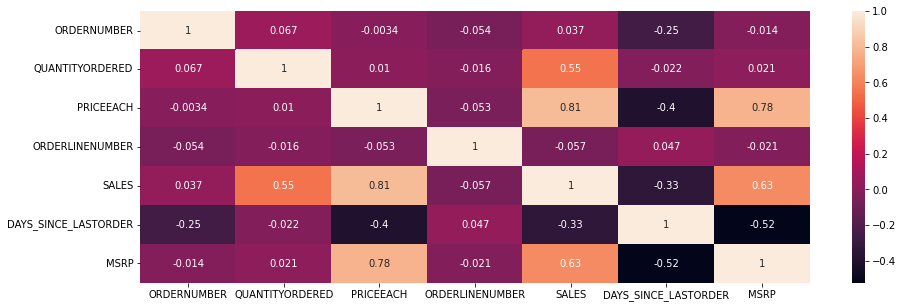

In [ ]:
figure = plt.figure(figsize=(15,5))
sns.heatmap(df.corr(), annot=True)  # plot the correlation coefficients 

Sales and Priceeach are highly positively collerated with coeffiecient of correlation=.81,priceeach and MSRP are poistively correlated (0.78) followed by sales and priceeach (0.63). Sales and order quantity shows a correlation of 0.55.

RFM Analysis
-For RFM analysis we only considered 4 columns as customer name ,order number ,order date and sales

In [ ]:
cols=['CUSTOMERNAME', 'ORDERNUMBER', 'ORDERDATE', 'SALES']
RFM_df=df[cols]
RFM_df.head()

,CUSTOMERNAME,ORDERNUMBER,ORDERDATE,SALES
0,Land of Toys Inc.,10107,2018-02-24,2871.00
1,Reims Collectables,10121,2018-05-07,2765.90
2,Lyon Souveniers,10134,2018-07-01,3884.34
3,Toys4GrownUps.com,10145,2018-08-25,3746.70
4,Technics Stores Inc.,10168,2018-10-28,3479.76


In [ ]:
RFM_df.shape

(2747, 4)

In [ ]:
RFM_df.describe()

,ORDERNUMBER,SALES
count,2747.000000,2747.000000
mean,10259.761558,3553.047583
std,91.877521,1838.953901
min,10100.000000,482.130000
25%,10181.000000,2204.350000
50%,10264.000000,3184.800000
75%,10334.500000,4503.095000
max,10425.000000,14082.800000


In [ ]:
RFM_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CUSTOMERNAME  2747 non-null   object        
 1   ORDERNUMBER   2747 non-null   int64         
 2   ORDERDATE     2747 non-null   datetime64[ns]
 3   SALES         2747 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 86.0+ KB


In [ ]:
RFM_df['ORDERDATE'].max()

Timestamp('2020-05-31 00:00:00')

In [ ]:
RFM_df['SALES'].max()

14082.8

Create the RFM Table

Given dataset last order date is 31st May, 2020, which we will use to calculate recency.

In [ ]:
import datetime as dt
NOW = dt.datetime(2020,5,31)

In [ ]:
from datetime import datetime
now = datetime.now()

In [ ]:
RFM_table=RFM_df.groupby('CUSTOMERNAME').agg({'ORDERDATE': lambda x: (NOW - x.max()).days, # Recency
                                                'ORDERNUMBER': lambda x: len(x.unique()), # Frequency
                                                'SALES': lambda x: x.sum()})    # Monetary 

RFM_table['ORDERDATE'] = RFM_table['ORDERDATE'].astype(int)

RFM_table.rename(columns={'ORDERDATE': 'Recency', 
                         'ORDERNUMBER': 'Frequency',
                         'SALES': 'Monetary_value'}, inplace=True)

In [ ]:
RFM_table.head()

,Recency,Frequency,Monetary_value
CUSTOMERNAME,,,
"AV Stores, Co.",196,3,157807.81
Alpha Cognac,64,3,70488.44
Amica Models & Co.,265,2,94117.26
"Anna's Decorations, Ltd",83,4,153996.13
Atelier graphique,188,3,24179.96


RFM_Grouping

In [ ]:
quantiles = RFM_table.quantile(q=[0.25,0.5,0.75,1.0])
quantiles

,Recency,Frequency,Monetary_value
0.25,75.0,2.0,70488.44
0.50,184.0,3.0,87489.23
0.75,230.0,3.0,120562.74
1.00,495.0,26.0,912294.11


Converting quantiles to a dictionary, easier to use.

In [ ]:
quantiles = quantiles.to_dict()
quantiles 

{'Frequency': {0.25: 2.0, 0.5: 3.0, 0.75: 3.0, 1.0: 26.0},
 'Monetary_value': {0.25: 70488.44,
  0.5: 87489.23000000001,
  0.75: 120562.74,
  1.0: 912294.11},
 'Recency': {0.25: 75.0, 0.5: 184.0, 0.75: 230.0, 1.0: 495.0}}

Recency Frequency Monetary Segmentation

In [ ]:
RFM_Segment = RFM_table.copy()

In [ ]:
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def R_Class(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
    
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FM_Class(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [ ]:
RFM_Segment['R_Quartile'] = RFM_Segment['Recency'].apply(R_Class, args=('Recency',quantiles,))
RFM_Segment['F_Quartile'] = RFM_Segment['Frequency'].apply(FM_Class, args=('Frequency',quantiles,))
RFM_Segment['M_Quartile'] = RFM_Segment['Monetary_value'].apply(FM_Class, args=('Monetary_value',quantiles,))

In [ ]:
RFM_Segment['RFMClass'] = RFM_Segment.R_Quartile.map(str) \
                            + RFM_Segment.F_Quartile.map(str) \
                            + RFM_Segment.M_Quartile.map(str)

In [ ]:

RFM_Segment.head()

,Recency,Frequency,Monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
CUSTOMERNAME,,,,,,,
"AV Stores, Co.",196,3,157807.81,2,2,4,224
Alpha Cognac,64,3,70488.44,4,2,1,421
Amica Models & Co.,265,2,94117.26,1,1,3,113
"Anna's Decorations, Ltd",83,4,153996.13,3,4,4,344
Atelier graphique,188,3,24179.96,2,2,1,221


In [ ]:
RFM_Segment['RFMClass'].max()

'444'

##Inferences from RFM Analysis and identified segments -

Who are your best customers? (BY RFMClass = 444)

In [ ]:
RFM_Segment[RFM_Segment['RFMClass']=='444'].sort_values('Monetary_value', ascending=False).head(5)

,Recency,Frequency,Monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
CUSTOMERNAME,,,,,,,
Euro Shopping Channel,0,26,912294.11,4,4,4,444
Mini Gifts Distributors Ltd.,2,17,654858.06,4,4,4,444
La Rochelle Gifts,0,4,180124.90,4,4,4,444
The Sharp Gifts Warehouse,39,4,160010.27,4,4,4,444
Souveniers And Things Co.,2,4,151570.98,4,4,4,444


Which customers are at the verge of churning? #Customers who's recency value is low

In [ ]:
RFM_Segment[RFM_Segment['R_Quartile'] <= 2 ].sort_values('Monetary_value', ascending=False).head(5)

,Recency,Frequency,Monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
CUSTOMERNAME,,,,,,,
Land of Toys Inc.,198,4,164069.44,2,4,4,244
"AV Stores, Co.",196,3,157807.81,2,2,4,224
"Saveley & Henriot, Co.",456,3,142874.25,1,2,4,124
Rovelli Gifts,201,3,137955.72,2,2,4,224
Online Diecast Creations Co.,209,3,131685.30,2,2,4,224


In [ ]:
RFM_Segment['R_Quartile'].min()

1

In [ ]:
RFM_Segment['RFMClass'].min()

'111'

Who are lost customers? #Customers who's recency, frequency as well as monetary values are low

In [ ]:
RFM_Segment[RFM_Segment['RFMClass']=='111'].sort_values('Recency',ascending=False).head(5)

,Recency,Frequency,Monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
CUSTOMERNAME,,,,,,,
"Double Decker Gift Stores, Ltd",495,2,36019.04,1,1,1,111
West Coast Collectables Co.,488,2,46084.64,1,1,1,111
Signal Collectibles Ltd.,476,2,50218.51,1,1,1,111
Daedalus Designs Imports,465,2,69052.41,1,1,1,111
CAF Imports,439,2,49642.05,1,1,1,111


Who are your loyal customers? #Customers with high frequency value

In [ ]:
RFM_Segment[RFM_Segment['F_Quartile'] >= 3 ].sort_values('Monetary_value', ascending=False).head(5)

,Recency,Frequency,Monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
CUSTOMERNAME,,,,,,,
Euro Shopping Channel,0,26,912294.11,4,4,4,444
Mini Gifts Distributors Ltd.,2,17,654858.06,4,4,4,444
"Australian Collectors, Co.",184,5,200995.41,3,4,4,344
Muscle Machine Inc,182,4,197736.94,3,4,4,344
La Rochelle Gifts,0,4,180124.90,4,4,4,444


End